<a href="https://colab.research.google.com/github/naufalfano/topicmodelling_LDA/blob/main/topicmodelling_lda_itsfess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleansing & Pre-Processing

In [2]:
#Upload file local ke dalam Google Colab
from google.colab import files
uploaded = files.upload()

Saving twit_fulltext.xlsx to twit_fulltext.xlsx


In [3]:
#Membaca file yang telah diupload
import pandas as pd
df = pd.read_excel('twit_fulltext.xlsx')

first_10_rows = df.head(10)
print(first_10_rows)

                                           full_text
0  OK CLOSE DULU YAðŸ«¶ NANTI BUKA LAGI KL BASENY...
1  OPEN FOLLBACK ITS_FESS COME BACKâ³  1. RT TWE...
2                      its/ BASE LAGI OFF YAAAAA????
3  ada yg udah sering banget berkecimpung sama it...
4          its/ info perpanjangan kuesioner ipd ðŸ™
5              Its/ Untuk angkatanku yang mau magang
6  Its/ saran taman deket its buat baca buku atau...
7                                 Its/ gabut ga seee
8  Its/ nyebelin banget lagi buka multitab buat n...
9  its/ rek saran dong kalo di sby enaknya ajak b...


**Convert to lowercase**

In [4]:
# Mengubah semua text menjadi lowercase
df['full_text'] = df['full_text'].str.lower()

first_10_rows = df.head(10)
print(first_10_rows)

                                           full_text
0  ok close dulu yaðÿ«¶ nanti buka lagi kl baseny...
1  open follback its_fess come backâ³  1. rt twe...
2                      its/ base lagi off yaaaaa????
3  ada yg udah sering banget berkecimpung sama it...
4          its/ info perpanjangan kuesioner ipd ðÿ™
5              its/ untuk angkatanku yang mau magang
6  its/ saran taman deket its buat baca buku atau...
7                                 its/ gabut ga seee
8  its/ nyebelin banget lagi buka multitab buat n...
9  its/ rek saran dong kalo di sby enaknya ajak b...


**Clear URL**

In [ ]:
import re

# Mendefinisikan Regex untuk mengidentifikasi pattern URL
pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

# Function untuk menghilangkan URL
def remove_urls(text):
    return re.sub(pattern, '', text)

# Menggunakan function pada kolom 'full_text'
column_name = 'full_text'
df[column_name] = df[column_name].apply(remove_urls)


**Clear its/**

In [6]:
#Menghilangkan "its/" pada awalan text
df['full_text'] = df['full_text'].str.replace('its/', '')

#Test
first_10_rows = df.head(10)
print(first_10_rows)

                                           full_text
0  ok close dulu yaðÿ«¶ nanti buka lagi kl baseny...
1  open follback its_fess come backâ³  1. rt twe...
2                           base lagi off yaaaaa????
3  ada yg udah sering banget berkecimpung sama  f...
4               info perpanjangan kuesioner ipd ðÿ™
5                   untuk angkatanku yang mau magang
6   saran taman deket its buat baca buku atau beb...
7                                      gabut ga seee
8   nyebelin banget lagi buka multitab buat ngisi...
9   rek saran dong kalo di sby enaknya ajak bapak...


**Make sure all word in alphabet**

In [9]:
import re
import pandas as pd

# Pola regex untuk identifikasi karakter non-alphabet
pattern = r'[^a-zA-Z\s]+'

# Function untuk menghapus karakter non-alphabet
def remove_non_alphabet(text):
    return re.sub(pattern, '', text)

# Mengubah value text menjadi string
df['full_text'] = df['full_text'].apply(lambda x: str(x) if not isinstance(x, str) else x)

# Menggunakan function pada kolom 'full_text'
df['full_text'] = df['full_text'].apply(remove_non_alphabet)

#Test
first_10_rows = df.head(10)
print(first_10_rows)

                                           full_text
0  ok close dulu ya nanti buka lagi kl basenya ud...
1  open follback itsfess come back   rt tweet ini...
2                               base lagi off yaaaaa
3  ada yg udah sering banget berkecimpung sama  f...
4                   info perpanjangan kuesioner ipd 
5                   untuk angkatanku yang mau magang
6   saran taman deket its buat baca buku atau beb...
7                                      gabut ga seee
8   nyebelin banget lagi buka multitab buat ngisi...
9   rek saran dong kalo di sby enaknya ajak bapak...


**Remove Punctuation**

In [12]:
import string

# Regex function untuk menghilangkan tanda baca
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Menggunakan function pada kolom 'full_text'
df['full_text'] = df['full_text'].apply(remove_punctuation)

#Test
first_10_rows = df.head(10)
print(first_10_rows)


                                           full_text
0  ok close dulu ya nanti buka lagi kl basenya ud...
1  open follback itsfess come back   rt tweet ini...
2                               base lagi off yaaaaa
3  ada yg udah sering banget berkecimpung sama  f...
4                   info perpanjangan kuesioner ipd 
5                   untuk angkatanku yang mau magang
6   saran taman deket its buat baca buku atau beb...
7                                      gabut ga seee
8   nyebelin banget lagi buka multitab buat ngisi...
9   rek saran dong kalo di sby enaknya ajak bapak...


**Remove Leading Space & Extra Whitespace**

In [13]:
# Menghilangkan leading space
df['full_text'] = df['full_text'].str.lstrip()

# Function untuk menghilangkan extra whitespace pada text
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()

# Apply the function to the specified column.
df['full_text'] = df['full_text'].apply(remove_extra_spaces)

# Test
first_10_rows = df.head(10)
print(first_10_rows)

                                           full_text
0  ok close dulu ya nanti buka lagi kl basenya ud...
1  open follback itsfess come back rt tweet ini r...
2                               base lagi off yaaaaa
3  ada yg udah sering banget berkecimpung sama fo...
4                    info perpanjangan kuesioner ipd
5                   untuk angkatanku yang mau magang
6  saran taman deket its buat baca buku atau beba...
7                                      gabut ga seee
8  nyebelin banget lagi buka multitab buat ngisi ...
9  rek saran dong kalo di sby enaknya ajak bapak ...


**Remove 1 word item**

In [16]:
# Function untuk menghilangkan kalimat yang hanya terdiri dari 1 kata
def remove_single_word(text):
    sentences = text.split('.')
    filtered_sentences = [sentence.strip() for sentence in sentences if len(sentence.split()) > 1]
    return '. '.join(filtered_sentences)

# Apply the function to the specified column.
df['full_text'] = df['full_text'].apply(remove_single_word)

# Test
first_10_rows = df.head(10)
print(first_10_rows)

                                           full_text
0  ok close dulu ya nanti buka lagi kl basenya ud...
1  open follback itsfess come back rt tweet ini r...
2                               base lagi off yaaaaa
3  ada yg udah sering banget berkecimpung sama fo...
4                    info perpanjangan kuesioner ipd
5                   untuk angkatanku yang mau magang
6  saran taman deket its buat baca buku atau beba...
7                                      gabut ga seee
8  nyebelin banget lagi buka multitab buat ngisi ...
9  rek saran dong kalo di sby enaknya ajak bapak ...


**Remove additional stopword**

In [17]:
#Function untuk menghilangkan additional stopwords
def remove_additional_stopwords(text):
    # Additional stopwords yang akan dihilangkan
    words_to_remove = ["arek", "rek", "mas", "mba", "mbak", "rt", "ga", "g", "ada", "yg", "yang", "dong", "sby", "surabaya", "titipan", "cowo", "cewe", "ya", "y", "km", "rekk", "apa", "gasi"]

    # Regex pattern untuk menyesuaikan kalimat
    pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'
    return re.sub(pattern, '', text)

# Apply the function to the specified column.
df['full_text'] = df['full_text'].apply(remove_additional_stopwords)

**Remove Stopword & Tokenizing**

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import pandas as pd
from nltk.corpus import stopwords

nltk.download('stopwords')

def tokenize_and_remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('indonesian'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

tokenized_text = 'full_text'
# Apply the function to the 'full_text' column
df['tokenized_text'] = df['full_text'].apply(tokenize_and_remove_stopwords)

print(df[['full_text', 'tokenized_text']])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                              full_text  \
0     ok close dulu  nanti buka lagi kl basenya udah...   
1     open follback itsfess come back  tweet ini rep...   
2                                  base lagi off yaaaaa   
3       udah sering banget berkecimpung sama food ka...   
4                       info perpanjangan kuesioner ipd   
...                                                 ...   
4952                                                      
4953                                                      
4954      jadi liburan kalian pada ngapain aku sih turu   
4955                                    gais mau nanya    
4956                                        sender maba   

                                         tokenized_text  
0           [ok, close, buka, kl, basenya, udah, aktif]  
1     [open, follback, itsfess, come, back, tweet, r...  
2                                   [base, off, yaaaaa]  
3     [udah, banget, berkecimpung, food, kah, tanyat...  
4

**Remove Null Value in Column**

In [ ]:
# Variable check null value
columns_to_check = ['full_text']

# Menghapus baris yang memiliki null value
df = df.dropna(subset=columns_to_check)

**Export**

In [ ]:
# Export hasil cleansing (.csv)
output_file = 'twit_cleaned.csv'

# Menyimpan dataframe menjadi csv
df.to_csv(output_file, index=False)

print(f'DataFrame has been saved to {output_file}')

DataFrame has been saved to twit_cleaned.csv


# Latent Dirichlet Allocation Model

**Import File**

In [ ]:
#Import file local kedalam Google Colab
from google.colab import files
uploaded = files.upload()

Saving twit_cleaned.csv to twit_cleaned (1).csv


In [ ]:
#Membaca file csv
import pandas as pd
df = pd.read_csv('twit_cleaned.csv')

text = df['full_text']

# Memastikan tidak ada value yang hilang
df['full_text'] = df['full_text'].fillna('')

# Mengubah teks menjadi list
text_list = [text.split() for text in df['full_text']]


first_10_rows = df.head(10)
print(first_10_rows)

                                           full_text  \
0  ok close dulu  nanti buka lagi kl basenya udah...   
1  open follback itsfess come back  tweet ini rep...   
2                               base lagi off yaaaaa   
3    udah sering banget berkecimpung sama food ka...   
4                    info perpanjangan kuesioner ipd   
5                       untuk angkatanku  mau magang   
6  saran taman deket its buat baca buku atau beba...   
7                                        gabut  seee   
8  nyebelin banget lagi buka multitab buat ngisi ...   
9   saran  kalo di  enaknya ajak bapak jalan ke m...   

                                      tokenized_text  
0  ['ok', 'close', 'buka', 'kl', 'basenya', 'udah...  
1  ['open', 'follback', 'itsfess', 'come', 'back'...  
2                          ['base', 'off', 'yaaaaa']  
3  ['udah', 'banget', 'berkecimpung', 'food', 'ka...  
4       ['info', 'perpanjangan', 'kuesioner', 'ipd']  
5                           ['angkatanku', 'magang'] 

**Creating Bigram & Trigram Model**

In [ ]:
import gensim

# Membuat model bigram & trigram
from gensim.models import Phrases

# Menambahkan bigram dan trigram yang muncul <=10 ke dalam document
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    # Memeriksa bigram dan trigram yang ditandai dengan identifier "_"
    for token in bigram[text_list[idx]]:
        if '_' in token:
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            text_list[idx].append(token)

**Create Dictionary**

In [ ]:
from gensim import corpora, models

# Membuat
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2)

#no_below (int, optional) – Menyimpan token yang muncul sebanyak <="no_below" dalam document.
#no_above (float, optional) – Menyimpan token yang muncul sebanyak >="no_above" dalam document. (nilai pecahan dari ukuran total corpus, bukan angka absolut).
print(dictionary)

Dictionary<1426 unique tokens: ['buka', 'dulu', 'kl', 'lagi', 'nanti']...>


**Create Corpus**

In [ ]:
#https://radimrehurek.com/gensim/tut1.html
# Build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]

# The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word,
converts the word to its integer word id and returns the result as a sparse vector.
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”,
the words computer (id 0) and human (id 1) appear once;
the other ten dictionary words appear (implicitly) zero times.'''

print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

4957
[(28, 1), (69, 1), (81, 1), (377, 1), (429, 1), (430, 2)]


**Coherence Analysis**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


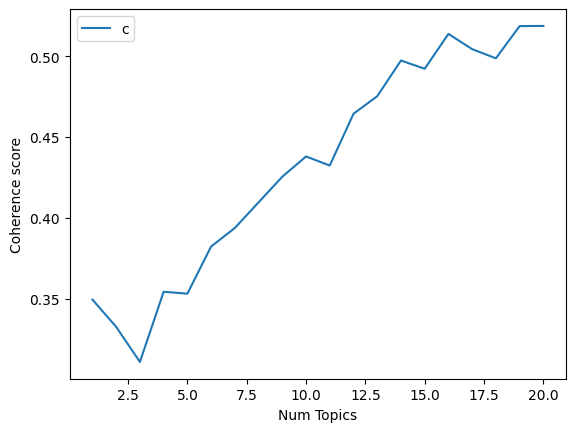

Num Topics = 1  has Coherence Value of 0.3495
Num Topics = 2  has Coherence Value of 0.332655
Num Topics = 3  has Coherence Value of 0.310978
Num Topics = 4  has Coherence Value of 0.354352
Num Topics = 5  has Coherence Value of 0.35319
Num Topics = 6  has Coherence Value of 0.382328
Num Topics = 7  has Coherence Value of 0.393783
Num Topics = 8  has Coherence Value of 0.409657
Num Topics = 9  has Coherence Value of 0.425487
Num Topics = 10  has Coherence Value of 0.438001
Num Topics = 11  has Coherence Value of 0.432393
Num Topics = 12  has Coherence Value of 0.46441
Num Topics = 13  has Coherence Value of 0.475237
Num Topics = 14  has Coherence Value of 0.497327
Num Topics = 15  has Coherence Value of 0.492226
Num Topics = 16  has Coherence Value of 0.513789
Num Topics = 17  has Coherence Value of 0.504349
Num Topics = 18  has Coherence Value of 0.498685
Num Topics = 19  has Coherence Value of 0.518609
Num Topics = 20  has Coherence Value of 0.518712


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array

# Function untuk menghitung coherence value
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf,
                                                        texts=text_list, start=start, limit=limit, step=step)
# Visualisasi data
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Print coherence value
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

**Build Topic Model**

In [ ]:
# Membangun model dengan jumlah topik berdasarkan hasil coherence score
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=20)
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 0 Word: 0.056*"review" + 0.053*"pkm" + 0.026*"smt" + 0.021*"dosen" + 0.015*"wajib" + 0.014*"itu" + 0.012*"dosennya" + 0.011*"kapan" + 0.009*"word" + 0.009*"sih"
Topic: 1 Word: 0.019*"spill" + 0.015*"kira_kira" + 0.012*"mulu" + 0.012*"kira" + 0.011*"tiket_kereta" + 0.010*"di" + 0.010*"pernah" + 0.010*"reply" + 0.010*"aja" + 0.010*"ngasih"
Topic: 2 Word: 0.021*"menurut_kalian" + 0.021*"worth_it" + 0.015*"teknik" + 0.014*"kuliah" + 0.013*"sini" + 0.012*"di_sini" + 0.012*"di" + 0.011*"hal" + 0.011*"tia" + 0.011*"it"
Topic: 3 Word: 0.045*"sks" + 0.022*"yaa" + 0.017*"maaf" + 0.016*"organisasi" + 0.014*"tau_tempat" + 0.013*"lebih" + 0.012*"mohon" + 0.011*"rekkk" + 0.011*"sendiri" + 0.011*"rencana"
Topic: 4 Word: 0.079*"mau_tanya" + 0.050*"skem" + 0.042*"tanya" + 0.025*"yuk" + 0.022*"ukt" + 0.020*"mau" + 0.014*"ets" + 0.014*"di" + 0.013*"info_kos" + 0.012*"bayar"
Topic: 5 Word: 0.038*"maba" + 0.021*"join" + 0.020*"bikin" + 0.017*"matkul" + 0.016*"udah" + 0.014*"sender" + 0.014*"ayang" +

**Save top-word to CSV**

In [ ]:
# Import top_word (Kata yang sering muncul dalam setiap topik) dalam bentuk CSV
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words.csv")
print(df)

None


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Visualization**

In [ ]:
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Visualisasi hasil topic modelling
data = gensimvis.prepare(model, corpus_tfidf, dictionary)
print(data)

pyLDAvis.display(data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1      0.005582 -0.014627       1        1  6.296258
0      0.086506 -0.104469       2        1  5.839810
8     -0.047726 -0.057146       3        1  5.555005
7      0.012483 -0.042536       4        1  5.442505
19    -0.191892 -0.034824       5        1  5.409266
13     0.077342 -0.032495       6        1  5.322711
10    -0.086953  0.122592       7        1  5.259972
2      0.076226 -0.060270       8        1  5.237543
16     0.120549  0.005508       9        1  5.193120
5      0.009732 -0.024656      10        1  5.059530
4     -0.064771 -0.177818      11        1  5.049069
9      0.028375  0.091091      12        1  4.909769
6      0.023420  0.030650      13        1  4.682535
3      0.049708  0.060145      14        1  4.655809
17    -0.128952  0.033555      15        1  4.594858
14     0.026505  0.082679      16        1  4.591659
18     0.018418